In [1]:
import sys
sys.path.append("..")

from TwinNeuralNetworkNearestNeighbors import TNNR_NN

import matplotlib.pyplot as plt

import numpy as np

In [2]:
def_func = lambda a: lambda x: x**3 - a*x

In [3]:
n = 2100
seed = 9876

a = 70

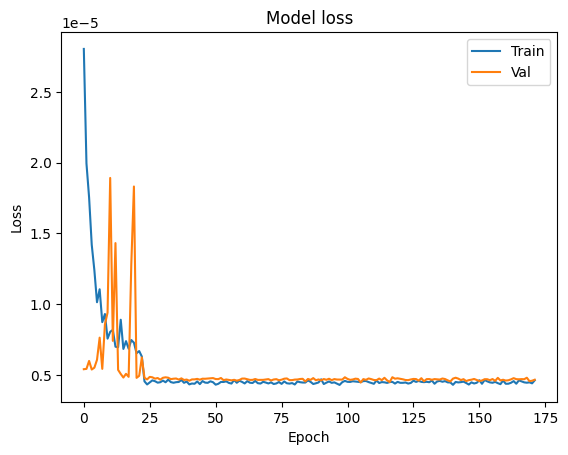

CPU times: user 3min 46s, sys: 38.6 s, total: 4min 25s
Wall time: 3min


In [5]:
%%time

tnnr_nn_test_64 = TNNR_NN(def_func(a), n=n, seed=seed, inverse_problem=True, test_pct=0.2, val_pct=0.2,
                          show_summary=False, show_loss_plot=True, show_rmse=False, 
                          mdl_wts_file='weights/tnnr_nn_test_64_n' + str(n) + '_inverse_a' + str(a),
                          num_nn_train=5)

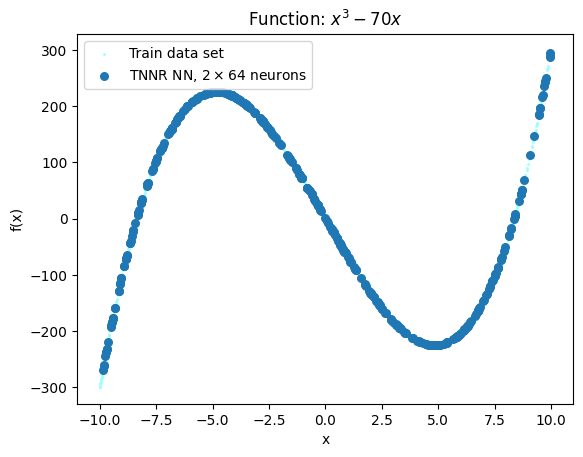

In [6]:
plt.scatter(tnnr_nn_test_64.cn_transformer.inverse_transform_x(tnnr_nn_test_64.x_train_single), 
            tnnr_nn_test_64.cn_transformer.inverse_transform_y(tnnr_nn_test_64.y_train_single),
            label='Train data set', s=1, c='#99ffff')
plt.scatter(tnnr_nn_test_64.x_pred_test,
            tnnr_nn_test_64.cn_transformer.inverse_transform_y(tnnr_nn_test_64.y_test_single),
            label='TNNR NN, $2\\times 64$ neurons', s=30)

plt.title('Function: $x^3 - 70x$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()

In [7]:
tnnr_nn_test_64.y_test_single

array([ 0.74974639, -0.20090987,  0.37379985,  0.73173653, -0.40006216,
        0.60269984, -0.5176423 ,  0.13752309,  0.4450251 ,  0.35902396,
       -0.09309824, -0.71256544, -0.23110605, -0.50366876, -0.67211739,
       -0.07684031, -0.694417  , -0.02750687,  0.63628338,  0.18549214,
        0.60798773,  0.5051237 , -0.53934017,  0.04605164, -0.62706288,
       -0.17548171,  0.6993156 ,  0.67866781, -0.52261854,  0.60655403,
       -0.61097373,  0.81960263, -0.26969184,  0.42692378, -0.75830297,
       -0.05178581,  0.67674577, -0.7067866 ,  0.75207374, -0.41831349,
       -0.71964327, -0.70885859,  0.09370453, -0.44023781,  0.74477284,
        0.76052872,  0.02123705, -0.18251333, -0.60049029, -0.64817709,
        0.75606856, -0.78145528,  0.16181667, -0.50685412, -0.35998887,
        0.53939756,  0.54972026, -0.70028181, -0.13984013,  0.69938307,
        0.67949266,  0.11372611, -0.16115422, -0.08139894, -0.34119764,
       -0.46258021, -0.42654548, -0.15304166,  0.96467137, -0.70

In [8]:
tnnr_nn_test_64.y_test_single.reshape(-1, 1)

array([[ 0.74974639],
       [-0.20090987],
       [ 0.37379985],
       [ 0.73173653],
       [-0.40006216],
       [ 0.60269984],
       [-0.5176423 ],
       [ 0.13752309],
       [ 0.4450251 ],
       [ 0.35902396],
       [-0.09309824],
       [-0.71256544],
       [-0.23110605],
       [-0.50366876],
       [-0.67211739],
       [-0.07684031],
       [-0.694417  ],
       [-0.02750687],
       [ 0.63628338],
       [ 0.18549214],
       [ 0.60798773],
       [ 0.5051237 ],
       [-0.53934017],
       [ 0.04605164],
       [-0.62706288],
       [-0.17548171],
       [ 0.6993156 ],
       [ 0.67866781],
       [-0.52261854],
       [ 0.60655403],
       [-0.61097373],
       [ 0.81960263],
       [-0.26969184],
       [ 0.42692378],
       [-0.75830297],
       [-0.05178581],
       [ 0.67674577],
       [-0.7067866 ],
       [ 0.75207374],
       [-0.41831349],
       [-0.71964327],
       [-0.70885859],
       [ 0.09370453],
       [-0.44023781],
       [ 0.74477284],
       [ 0

In [9]:
from sklearn.neighbors import NearestNeighbors

def get_nearest_neighbors(x_new, x_reference, num_neighbors):
    neighbor_finder = NearestNeighbors(n_neighbors=num_neighbors)
    neighbor_finder.fit(x_reference)
    return neighbor_finder.kneighbors(x_new, return_distance=False)

def get_nearest_neighbors_radius(x_new, x_reference, radius_neighbors):
    neighbor_finder = NearestNeighbors(radius=radius_neighbors)
    neighbor_finder.fit(x_reference)
    return neighbor_finder.radius_neighbors(x_new, return_distance=False)

In [11]:
y_news = tnnr_nn_test_64.y_test_single
y_nn_indexes = get_nearest_neighbors(y_news.reshape(-1, 1), tnnr_nn_test_64.y_train_single.reshape(-1, 1), 10)

In [12]:
y_news

array([ 0.74974639, -0.20090987,  0.37379985,  0.73173653, -0.40006216,
        0.60269984, -0.5176423 ,  0.13752309,  0.4450251 ,  0.35902396,
       -0.09309824, -0.71256544, -0.23110605, -0.50366876, -0.67211739,
       -0.07684031, -0.694417  , -0.02750687,  0.63628338,  0.18549214,
        0.60798773,  0.5051237 , -0.53934017,  0.04605164, -0.62706288,
       -0.17548171,  0.6993156 ,  0.67866781, -0.52261854,  0.60655403,
       -0.61097373,  0.81960263, -0.26969184,  0.42692378, -0.75830297,
       -0.05178581,  0.67674577, -0.7067866 ,  0.75207374, -0.41831349,
       -0.71964327, -0.70885859,  0.09370453, -0.44023781,  0.74477284,
        0.76052872,  0.02123705, -0.18251333, -0.60049029, -0.64817709,
        0.75606856, -0.78145528,  0.16181667, -0.50685412, -0.35998887,
        0.53939756,  0.54972026, -0.70028181, -0.13984013,  0.69938307,
        0.67949266,  0.11372611, -0.16115422, -0.08139894, -0.34119764,
       -0.46258021, -0.42654548, -0.15304166,  0.96467137, -0.70

In [13]:
y_nn_indexes

array([[1106,  353, 1011, ...,  514, 1055,  344],
       [ 725,   85,  328, ...,   37,  174,  795],
       [1019, 1162,  698, ...,  663,  958, 1175],
       ...,
       [ 147,  794,  261, ...,  160,  252,  853],
       [ 770, 1062,  654, ..., 1256,  588, 1254],
       [1128,  194,   14, ...,  809,  540,  262]])

In [14]:
# for y_new in (range(len(y_news))):
y_new_index = 1

In [15]:
tnnr_nn_test_64.y_train_single[y_nn_indexes[y_new_index]]

array([-0.20081452, -0.2013953 , -0.19922712, -0.19852083, -0.20358667,
       -0.2055137 , -0.20677024, -0.19460595, -0.20827062, -0.20849992])

In [18]:
tnnr_nn_test_64.y_train_single.shape

(1260,)

In [19]:
tnnr_nn_test_64.x_train_single.shape

(1260, 1)

In [20]:
y_nn = tnnr_nn_test_64.y_train_single[y_nn_indexes[y_new_index]]
y_nn

array([-0.20081452, -0.2013953 , -0.19922712, -0.19852083, -0.20358667,
       -0.2055137 , -0.20677024, -0.19460595, -0.20827062, -0.20849992])

In [21]:
x_nn = tnnr_nn_test_64.x_train_single[y_nn_indexes[y_new_index]]
x_nn

array([[-0.83504967],
       [ 0.12035792],
       [ 0.1193983 ],
       [ 0.11908588],
       [ 0.78878048],
       [ 0.12218299],
       [ 0.12274043],
       [ 0.11735571],
       [ 0.12340641],
       [ 0.78749429]])

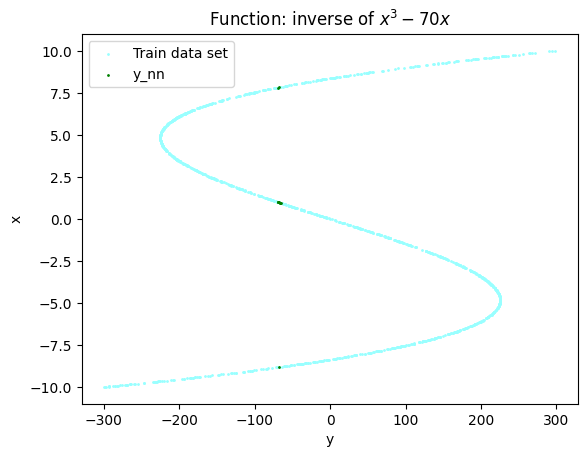

In [69]:
plt.scatter(tnnr_nn_test_64.cn_transformer.inverse_transform_y(tnnr_nn_test_64.y_train_single),
            tnnr_nn_test_64.cn_transformer.inverse_transform_x(tnnr_nn_test_64.x_train_single),
            label='Train data set', s=1, c='#99ffff')

plt.scatter(tnnr_nn_test_64.cn_transformer.inverse_transform_y(y_nn),
            tnnr_nn_test_64.cn_transformer.inverse_transform_x(x_nn),
            label='y_nn', s=1, c='green')

plt.title('Function: inverse of $x^3 - 70x$')
plt.xlabel('y')
plt.ylabel('x')
plt.legend()

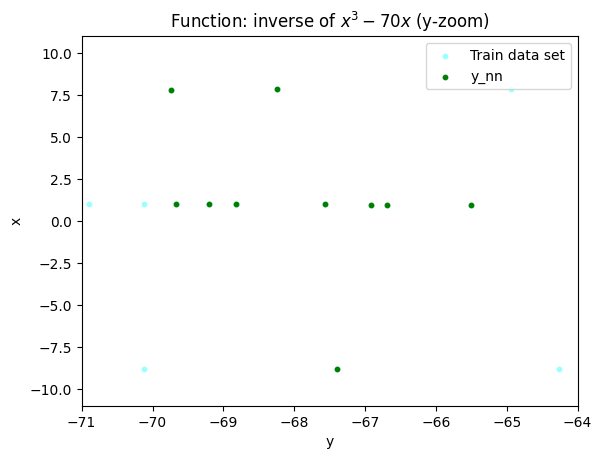

In [73]:
plt.scatter(tnnr_nn_test_64.cn_transformer.inverse_transform_y(tnnr_nn_test_64.y_train_single),
            tnnr_nn_test_64.cn_transformer.inverse_transform_x(tnnr_nn_test_64.x_train_single),
            label='Train data set', s=10, c='#99ffff')

plt.scatter(tnnr_nn_test_64.cn_transformer.inverse_transform_y(y_nn),
            tnnr_nn_test_64.cn_transformer.inverse_transform_x(x_nn),
            label='y_nn', s=10, c='green')

plt.xlim([-71, -64])
plt.title('Function: inverse of $x^3 - 70x$ (y-zoom)')
plt.xlabel('y')
plt.ylabel('x')
plt.legend(loc='upper right')

In [22]:
# si son los valores de los indices? si son!
tnnr_nn_test_64.y_train_single[725]

-0.20081451535837744

In [23]:
tnnr_nn_test_64.x_train_single[725]

array([-0.83504967])

In [24]:
# for i in range(len(y_nn)):
i = 1

In [25]:
y_nn[i]

-0.20139529800832973

In [26]:
x_nn[i]

array([0.12035792])

In [47]:
x_nni_nn_indexes = get_nearest_neighbors_radius(x_nn[i].reshape(-1, 1), 
                                                tnnr_nn_test_64.x_train_single, 
                                                0.02)
x_nni_nn_indexes

array([array([ 544,  956,  158,  935,  739,  973,  929,  982,  358, 1241,  798,
                85,  854,  328,   37,  457,  868,  174,  515,  254,  791,   81,
               953,  847,  239, 1089, 1230, 1168,  734,  567])                 ],
      dtype=object)

In [48]:
x_nni_nn_indexes[0].shape

(30,)

In [50]:
x_nni_nn = tnnr_nn_test_64.x_train_single[x_nni_nn_indexes[0]]
x_nni_nn

array([[0.10137089],
       [0.10096499],
       [0.10346052],
       [0.10206798],
       [0.10774209],
       [0.10928832],
       [0.10960029],
       [0.10988965],
       [0.11267228],
       [0.12218299],
       [0.1150443 ],
       [0.12035792],
       [0.11908588],
       [0.1193983 ],
       [0.11735571],
       [0.11449375],
       [0.12274043],
       [0.12340641],
       [0.124059  ],
       [0.12519225],
       [0.12744302],
       [0.13094732],
       [0.13095098],
       [0.13299195],
       [0.13349232],
       [0.13705837],
       [0.13500519],
       [0.137779  ],
       [0.13714768],
       [0.1378001 ]])

In [51]:
x_nni_nn.shape

(30, 1)

In [52]:
y_nni_nn = tnnr_nn_test_64.y_train_single[x_nni_nn_indexes[0]]
y_nni_nn

array([-0.15817346, -0.1572426 , -0.16296155, -0.15977155, -0.17274918,
       -0.17627601, -0.17698708, -0.17764645, -0.18397954, -0.2055137 ,
       -0.18936675, -0.2013953 , -0.19852083, -0.19922712, -0.19460595,
       -0.18811732, -0.20677024, -0.20827062, -0.2097399 , -0.21228927,
       -0.21734448, -0.2251931 , -0.22520128, -0.22975978, -0.2308759 ,
       -0.23881345, -0.23424698, -0.24041385, -0.23901188, -0.24046068])

In [53]:
y_nni_nn.shape

(30,)

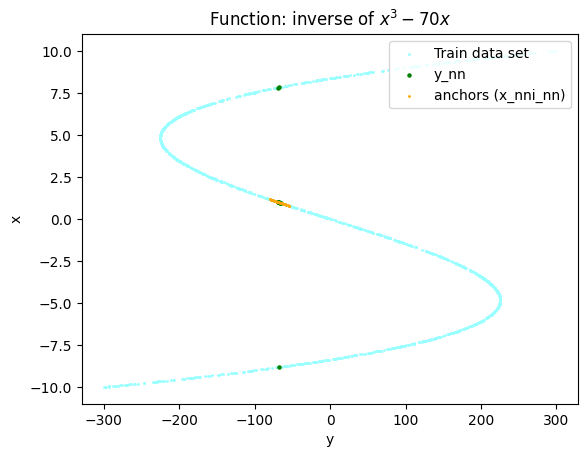

In [68]:
plt.scatter(tnnr_nn_test_64.cn_transformer.inverse_transform_y(tnnr_nn_test_64.y_train_single),
            tnnr_nn_test_64.cn_transformer.inverse_transform_x(tnnr_nn_test_64.x_train_single),
            label='Train data set', s=1, c='#99ffff')

plt.scatter(tnnr_nn_test_64.cn_transformer.inverse_transform_y(y_nn),
            tnnr_nn_test_64.cn_transformer.inverse_transform_x(x_nn),
            label='y_nn', s=5, c='green')

plt.scatter(tnnr_nn_test_64.cn_transformer.inverse_transform_y(y_nni_nn),
            tnnr_nn_test_64.cn_transformer.inverse_transform_x(x_nni_nn),
            label='anchors (x_nni_nn)', s=1, c='orange')

plt.title('Function: inverse of $x^3 - 70x$')
plt.xlabel('y')
plt.ylabel('x')
plt.legend(loc='upper right')

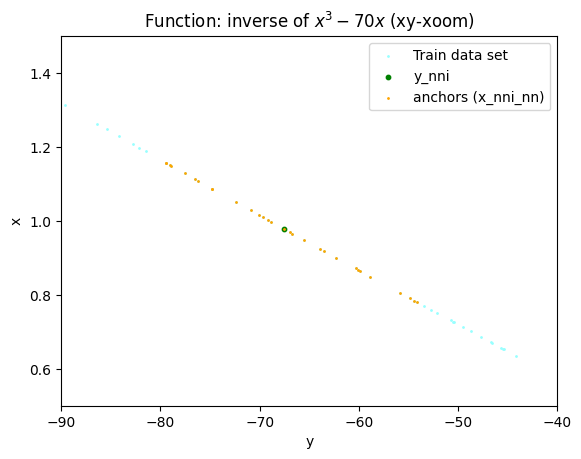

In [88]:
plt.scatter(tnnr_nn_test_64.cn_transformer.inverse_transform_y(tnnr_nn_test_64.y_train_single),
            tnnr_nn_test_64.cn_transformer.inverse_transform_x(tnnr_nn_test_64.x_train_single),
            label='Train data set', s=1, c='#99ffff')

plt.scatter(tnnr_nn_test_64.cn_transformer.inverse_transform_y(y_nn[i]),
            tnnr_nn_test_64.cn_transformer.inverse_transform_x(x_nn[i]),
            label='y_nni', s=10, c='green')

plt.scatter(tnnr_nn_test_64.cn_transformer.inverse_transform_y(y_nni_nn),
            tnnr_nn_test_64.cn_transformer.inverse_transform_x(x_nni_nn),
            label='anchors (x_nni_nn)', s=1, c='orange')

plt.xlim([-90, -40])
plt.ylim([0.5, 1.5])
plt.title('Function: inverse of $x^3 - 70x$ (xy-xoom)')
plt.xlabel('y')
plt.ylabel('x')
plt.legend()

In [75]:
len(x_nni_nn)

30

In [76]:
#j_random = np.random.randint(len(x_nni_nn))
j_random = 15

In [82]:
tnnr_nn_test_64.cn_transformer.inverse_transform_x(x_nni_nn[j_random])

array([0.91860852])

In [81]:
tnnr_nn_test_64.cn_transformer.inverse_transform_y(y_nni_nn[j_random])

-63.52743628011868

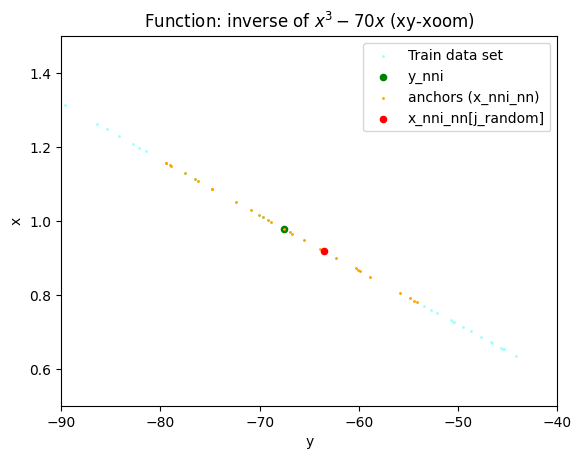

In [111]:
plt.scatter(tnnr_nn_test_64.cn_transformer.inverse_transform_y(tnnr_nn_test_64.y_train_single),
            tnnr_nn_test_64.cn_transformer.inverse_transform_x(tnnr_nn_test_64.x_train_single),
            label='Train data set', s=1, c='#99ffff')

plt.scatter(tnnr_nn_test_64.cn_transformer.inverse_transform_y(y_nn[i]),
            tnnr_nn_test_64.cn_transformer.inverse_transform_x(x_nn[i]),
            label='y_nni', s=20, c='green')

plt.scatter(tnnr_nn_test_64.cn_transformer.inverse_transform_y(y_nni_nn),
            tnnr_nn_test_64.cn_transformer.inverse_transform_x(x_nni_nn),
            label='anchors (x_nni_nn)', s=1, c='orange')

plt.scatter(tnnr_nn_test_64.cn_transformer.inverse_transform_y(y_nni_nn[j_random]),
            tnnr_nn_test_64.cn_transformer.inverse_transform_x(x_nni_nn[j_random]),
            label='x_nni_nn[j_random]', s=20, c='red')

plt.xlim([-90, -40])
plt.ylim([0.5, 1.5])
plt.title('Function: inverse of $x^3 - 70x$ (xy-xoom)')
plt.xlabel('y')
plt.ylabel('x')
plt.legend()

In [95]:
x_nni_nnj_nn_indexes = get_nearest_neighbors_radius(x_nni_nn[j_random].reshape(-1, 1), 
                                                    x_nni_nn,
                                                    0.01)

x_nni_nnj_nn_indexes

array([array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18])],
      dtype=object)

In [96]:
x_nni_nnj_nn_indexes[0].shape

(15,)

In [98]:
x_nni_nnj_nn = x_nni_nn[x_nni_nnj_nn_indexes[0]]
x_nni_nnj_nn

array([[0.10774209],
       [0.10928832],
       [0.10960029],
       [0.10988965],
       [0.11267228],
       [0.12218299],
       [0.1150443 ],
       [0.12035792],
       [0.11908588],
       [0.1193983 ],
       [0.11735571],
       [0.11449375],
       [0.12274043],
       [0.12340641],
       [0.124059  ]])

In [100]:
y_nni_nnj_nn = y_nni_nn[x_nni_nnj_nn_indexes[0]]
y_nni_nnj_nn

array([-0.17274918, -0.17627601, -0.17698708, -0.17764645, -0.18397954,
       -0.2055137 , -0.18936675, -0.2013953 , -0.19852083, -0.19922712,
       -0.19460595, -0.18811732, -0.20677024, -0.20827062, -0.2097399 ])

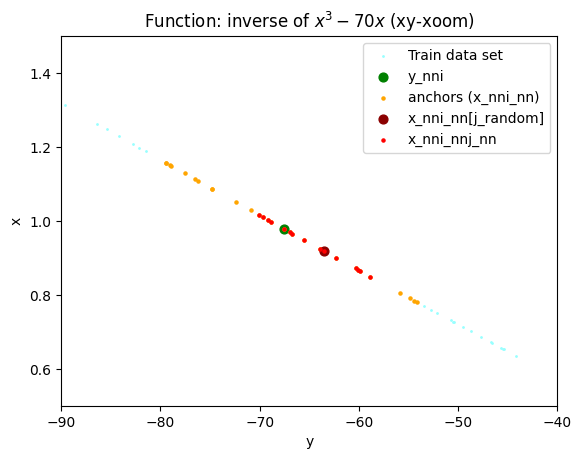

In [108]:
plt.scatter(tnnr_nn_test_64.cn_transformer.inverse_transform_y(tnnr_nn_test_64.y_train_single),
            tnnr_nn_test_64.cn_transformer.inverse_transform_x(tnnr_nn_test_64.x_train_single),
            label='Train data set', s=1, c='#99ffff')

plt.scatter(tnnr_nn_test_64.cn_transformer.inverse_transform_y(y_nn[i]),
            tnnr_nn_test_64.cn_transformer.inverse_transform_x(x_nn[i]),
            label='y_nni', s=40, c='green')

plt.scatter(tnnr_nn_test_64.cn_transformer.inverse_transform_y(y_nni_nn),
            tnnr_nn_test_64.cn_transformer.inverse_transform_x(x_nni_nn),
            label='anchors (x_nni_nn)', s=5, c='orange')

plt.scatter(tnnr_nn_test_64.cn_transformer.inverse_transform_y(y_nni_nn[j_random]),
            tnnr_nn_test_64.cn_transformer.inverse_transform_x(x_nni_nn[j_random]),
            label='x_nni_nn[j_random]', s=40, c='darkred')

plt.scatter(tnnr_nn_test_64.cn_transformer.inverse_transform_y(y_nni_nnj_nn),
            tnnr_nn_test_64.cn_transformer.inverse_transform_x(x_nni_nnj_nn),
            label='x_nni_nnj_nn', s=5, c='red')

plt.xlim([-90, -40])
plt.ylim([0.5, 1.5])
plt.title('Function: inverse of $x^3 - 70x$ (xy-xoom)')
plt.xlabel('y')
plt.ylabel('x')
plt.legend()

In [112]:
len(y_nni_nnj_nn)

15

In [113]:
y_nni_nn[j_random]

-0.188117321773511

In [114]:
pair_b = np.array([y_nni_nn[j_random]] * len(y_nni_nnj_nn))
pair_b

array([-0.18811732, -0.18811732, -0.18811732, -0.18811732, -0.18811732,
       -0.18811732, -0.18811732, -0.18811732, -0.18811732, -0.18811732,
       -0.18811732, -0.18811732, -0.18811732, -0.18811732, -0.18811732])

In [116]:
diff_a = tnnr_nn_test_64.model.predict([pair_b, y_nni_nnj_nn], verbose=False).flatten()
diff_a

array([-9.9359569e-04, -7.9583307e-04, -7.5595989e-04, -7.1898825e-04,
       -3.6386936e-04,  1.1835617e-03, -6.1783707e-05,  8.0557424e-04,
        5.2936631e-04,  5.9735286e-04,  2.3199501e-04, -1.3184571e-04,
        1.2438421e-03,  1.3158170e-03,  1.3863037e-03], dtype=float32)

In [117]:
diff_b = tnnr_nn_test_64.model.predict([y_nni_nnj_nn, pair_b], verbose=False).flatten()
diff_b

array([ 0.00104824,  0.00074792,  0.00068737,  0.00063121,  0.00015331,
       -0.00133273, -0.00021794, -0.00104747, -0.00084879, -0.00089746,
       -0.000579  , -0.00013185, -0.00141977, -0.0015237 , -0.00162547],
      dtype=float32)

In [128]:
x_pred = np.average(0.5 * diff_a - 0.5 * diff_b + x_nni_nnj_nn, weights=None)
x_pred

0.11681542436619402

In [148]:
tnnr_nn_test_64.cn_transformer.inverse_transform_x(x_pred)

array([0.94239981])

In [154]:
#x_mse = (x_pred - x_nni_nn[j_random]) ** 2
#x_mse

In [155]:
x_nni_nn

array([[0.10137089],
       [0.10096499],
       [0.10346052],
       [0.10206798],
       [0.10774209],
       [0.10928832],
       [0.10960029],
       [0.10988965],
       [0.11267228],
       [0.12218299],
       [0.1150443 ],
       [0.12035792],
       [0.11908588],
       [0.1193983 ],
       [0.11735571],
       [0.11449375],
       [0.12274043],
       [0.12340641],
       [0.124059  ],
       [0.12519225],
       [0.12744302],
       [0.13094732],
       [0.13095098],
       [0.13299195],
       [0.13349232],
       [0.13705837],
       [0.13500519],
       [0.137779  ],
       [0.13714768],
       [0.1378001 ]])

In [174]:
x_nni_nnj_nn_indexes

array([array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18])],
      dtype=object)

In [170]:
x_nni_nn2 = np.delete(x_nni_nn, 29)
x_nni_nn2

array([0.10137089, 0.10096499, 0.10346052, 0.10206798, 0.10774209,
       0.10928832, 0.10960029, 0.10988965, 0.11267228, 0.12218299,
       0.1150443 , 0.12035792, 0.11908588, 0.1193983 , 0.11735571,
       0.11449375, 0.12274043, 0.12340641, 0.124059  , 0.12519225,
       0.12744302, 0.13094732, 0.13095098, 0.13299195, 0.13349232,
       0.13705837, 0.13500519, 0.137779  , 0.13714768])

In [175]:
j_random

15

In [176]:
np.append(x_nni_nnj_nn_indexes[0], j_random)

array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 15])

In [196]:
x_nni_nn.shape[0]

12

In [208]:
%%time

# all the code

x_pred_test = []
y_pred_test = []
x_mse_test = []

y_news = tnnr_nn_test_64.y_test_single
y_nn_indexes = tnnr_nn_test_64.get_nearest_neighbors(y_news.reshape(-1, 1), 
                                                     tnnr_nn_test_64.y_train_single.reshape(-1, 1),
                                                     10)
#print('len(y_news)=', len(y_news))

for y_new_index in (range(len(y_news))):                   # for each y_new
    
    #print('------- starting 1st for: y_new_index=', y_new_index)

    y_nn = tnnr_nn_test_64.y_train_single[y_nn_indexes[y_new_index]]  # y_new neighbors (y-space)
    x_nn = tnnr_nn_test_64.x_train_single[y_nn_indexes[y_new_index]]  # and their corresponding x_new

    #print('len(y_nn)=', len(y_nn))
    for i in range(len(y_nn)):                             # for each neighbor in y-space, y_nni = y_nn[i]
        
        #print('------- starting 2nd for: i=', i)
        
        # get neighbors of the corresponding x_nni = x_nn[i]
        x_nni_nn_indexes = tnnr_nn_test_64.get_nearest_neighbors_radius(x_nn[i].reshape(-1, 1), 
                                                                        tnnr_nn_test_64.x_train_single,
                                                                        0.02)
        x_nni_nn = tnnr_nn_test_64.x_train_single[x_nni_nn_indexes[0]]  # anchors (orange circle)
        y_nni_nn = tnnr_nn_test_64.y_train_single[x_nni_nn_indexes[0]]

        x_pred_nni_nn = []

        while len(x_nni_nn) > 0:
            
            #print('starting while', len(x_nni_nn))

            j_random = np.random.randint(len(x_nni_nn))      # get random point from anchors
            # (x_nni_nnj, y_nni_nnj) = (x_nni_nn[j_random], y_nni_nn[j_random])   <-  red point
            x_nni_nnj_nn_indexes = tnnr_nn_test_64.get_nearest_neighbors_radius(x_nni_nn[j_random].reshape(-1, 1),
                                                                                x_nni_nn.reshape(-1, 1),
                                                                                0.01)
            if len(x_nni_nnj_nn_indexes[0]) >= 1:

                x_nni_nnj_nn = x_nni_nn[x_nni_nnj_nn_indexes[0]]  # points inside red circle
                y_nni_nnj_nn = y_nni_nn[x_nni_nnj_nn_indexes[0]]

                # make prediction
                pair_b = np.array([y_nni_nn[j_random]] * len(y_nni_nnj_nn))
                diff_a = tnnr_nn_test_64.model.predict([pair_b, y_nni_nnj_nn], 
                                                       verbose=tnnr_nn_test_64.verbosity).flatten()
                diff_b = tnnr_nn_test_64.model.predict([y_nni_nnj_nn, pair_b], 
                                                       verbose=tnnr_nn_test_64.verbosity).flatten()

                if tnnr_nn_test_64.zero_F_testing:
                    x_pred_nni_nn.append(x_nni_nnj_nn)
                else:
                    x_pred_nni_nn.append(
                        np.average(0.5 * diff_a - 0.5 * diff_b + x_nni_nnj_nn, weights=None))

            # remove the used anchors: from x_nni_nn remove with x_nni_nnj_nn_indexes
            x_nni_nn = np.delete(x_nni_nn, x_nni_nnj_nn_indexes[0])
            y_nni_nn = np.delete(y_nni_nn, x_nni_nnj_nn_indexes[0])

            #print('after delete:', len(x_nni_nn))
            
            #if len(x_nni_nn) == 0:
            #    break
            #if x_nni_nn.shape[0] == 0:
            #    break
                
            #print('after after delete:', x_nni_nn.shape[0])

        x_pred_test.append(np.average(x_pred_nni_nn))
        y_pred_test.append(y_nn[i])
        x_mse_test.append((x_pred_test[-1] - x_nn[i]) ** 2)

CPU times: user 31min 16s, sys: 41min 58s, total: 1h 13min 14s
Wall time: 7min 26s


In [209]:
len(x_pred_test)

4200

In [211]:
len(y_pred_test)

4200

In [210]:
len(tnnr_nn_test_64.y_test_single)

420

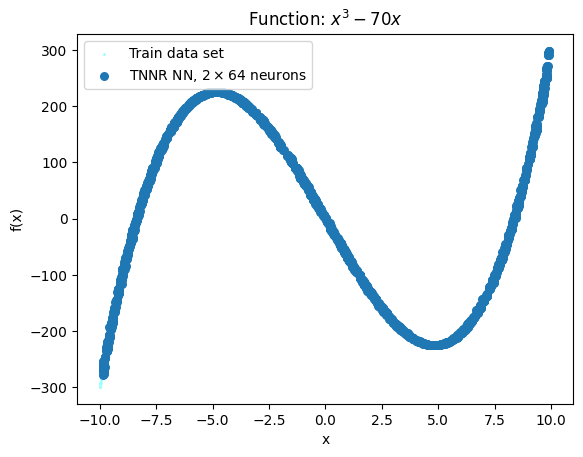

In [217]:
plt.scatter(tnnr_nn_test_64.cn_transformer.inverse_transform_x(tnnr_nn_test_64.x_train_single), 
            tnnr_nn_test_64.cn_transformer.inverse_transform_y(tnnr_nn_test_64.y_train_single),
            label='Train data set', s=1, c='#99ffff')
plt.scatter(tnnr_nn_test_64.cn_transformer.inverse_transform_x(x_pred_test),
            tnnr_nn_test_64.cn_transformer.inverse_transform_y(np.array(y_pred_test)),
            label='TNNR NN, $2\\times 64$ neurons', s=30)

plt.title('Function: $x^3 - 70x$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()

In [219]:
np.average(x_mse_test) ** 0.5

0.0025934583854210448

In [220]:
#before
tnnr_nn_test_64.rmse_test

6.851771447678038

In [67]:
x_full = np.random.sample([100, 1]) * 20 - 10
y_full = np.array([def_func(a)(x) for x in x_full]).flatten()

noise_range_x = (-0.5, 0.5)
noise_range_y = (-0.5, 0.5)

#(b - a) * random_sample() + a

if noise_range_x is not None:
    x_full_noise = x_full + ((noise_range_x[1] - noise_range_x[0]) * np.random.sample(x_full.shape) + noise_range_x[0])
if noise_range_y is not None:
    y_full_noise = y_full + ((noise_range_x[1] - noise_range_x[0]) * np.random.sample(y_full.shape) + noise_range_y[0])

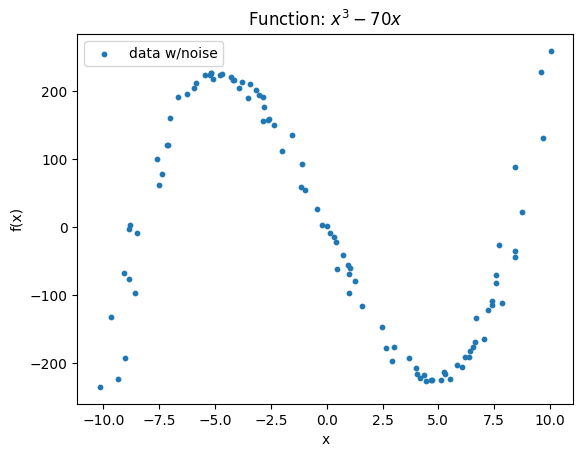

In [70]:
plt.scatter(x_full, y_full, label='data', s=10, c='#99ffff')

plt.scatter(x_full_noise, y_full_noise, label='data w/noise', s=10)

plt.title('Function: $x^3 - 70x$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()

In [62]:
x_full.shape

(100, 1)

In [96]:
x_full = np.random.sample([100, 1]) * 20 - 10
y_full = np.array([def_func(a)(x) for x in x_full]).flatten()

noise_normal_x = (0, 0.2)
noise_normal_y = (0, 1)

#(b - a) * random_sample() + a

if noise_range_x is not None:
    x_full_noise = x_full + np.random.normal(noise_normal_x[0], noise_normal_x[1], x_full.shape)
if noise_range_y is not None:
    y_full_noise = y_full + np.random.normal(noise_normal_y[0], noise_normal_y[1], y_full.shape)

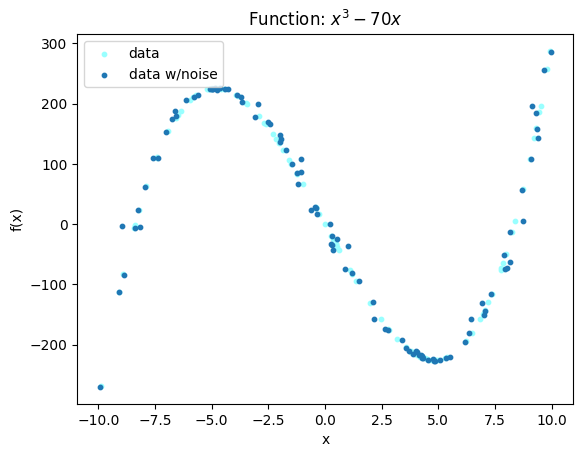

In [98]:
plt.scatter(x_full, y_full, label='data', s=10, c='#99ffff')

plt.scatter(x_full_noise, y_full_noise, label='data w/noise', s=10)

plt.title('Function: $x^3 - 70x$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()